In [1]:
using Plots

In [2]:
struct Node{T}
    min::T
    max::T
    left::Union{Node, Nothing}
    right::Union{Node, Nothing}
    tree::Union{Node, Nothing}
    
    Node(x::T) where T = new{T}(x, x, nothing, nothing, nothing)
    Node(x::T, y::T; l=nothing, r=nothing, t=nothing) where T = new{T}(x, y, l, r, t)
end

In [85]:
A = [
    2 3
    5 1
    4 2
    3 4
]

sortslices(A, dims=1, by=x->x[1])

4×2 Matrix{Int64}:
 2  3
 3  4
 4  2
 5  1

In [25]:
root = Node(.1,.2,l=Node(.1,.2,l=Node(.5)))
root.left.left.min

0.5

In [93]:
function BuildYTree(S, i, j)
    Y = sortslices(S, dims=1, by=x->x[2])
    if i == j
        return Node(Y[i,:])
    else
        m = (i + j) ÷ 2
        return Node(X[1,:], X[end,:], l=BuildYTree(X, i, m), r=BuildYTree(X, m+1, j))
    end
end

function BuildXTree(S, i, j)
    X = sortslices(S, dims=1, by=x->x[1])
    if i == j
        return Node(X[i,:])
    else
        m = (i + j) ÷ 2
        return Node(X[1,:], X[end,:], l=BuildXTree(X, i, m), r=BuildXTree(X, m+1, j), t=BuildYTree(X, i, j))
    end
end

BuildXTree(S) = BuildXTree(S, 1, size(S)[1])

S = [
    2 3
    5 1
    4 2
    3 4
    1 7
]

tree = BuildXTree(S)

function RTsearch(tree, p, q, i, j)
    points = []
    n = tree

Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([1, 7], [1, 7], nothing, nothing, nothing), Node{Vector{Int64}}([2, 3], [2, 3], nothing, nothing, nothing), Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([5, 1], [5, 1], nothing, nothing, nothing), Node{Vector{Int64}}([4, 2], [4, 2], nothing, nothing, nothing), nothing)), Node{Vector{Int64}}([3, 4], [3, 4], nothing, nothing, nothing), Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([5, 1], [5, 1], nothing, nothing, nothing), Node{Vector{Int64}}([4, 2], [4, 2], nothing, nothing, nothing), nothing), Node{Vector{Int64}}([2, 3], [2, 3], nothing, nothing, nothing), nothing)), Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([4, 2], [4, 2], nothing, nothing, nothing), Node{Vector{Int64}}([5, 1], [5, 1], nothing, nothing, nothing), Node{Vector{Int64}}([1, 7], [5, 1], Node{Vector{Int64}}([3, 4], [3, 4], noth

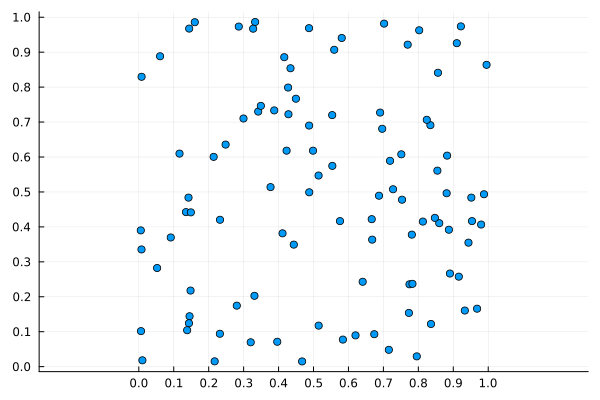

In [37]:
n = 100
S = rand(n,2)

scatter(S[:,1], S[:,2], ratio=1, label=nothing)

xaxis!(0:.1:1)
yaxis!(0:.1:1)